In [2]:
#import library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from geopy.distance import distance,great_circle

In [3]:
# read data

df=pd.read_csv('preprocessed_1.csv')
pd.set_option('display.max_columns',None)
df['Freight Cost (USD)']=df['Freight Cost (USD)'].astype('int64')
df['Delivery_Month']=pd.to_datetime(df['Delivered to Client Date']).dt.month
df['Delivery_Year']=pd.to_datetime(df['Delivered to Client Date']).dt.year
df.head()

ID Project Code            PQ # PO / SO # ASN/DN #  Country Managed By  \
0  11312   127-KE-T01  Pre-PQ Process  SO-29010  DN-1193    Kenya   PMO - US   
1  11966   127-KE-T01  Pre-PQ Process  SO-29010  DN-1193    Kenya   PMO - US   
2  12830   127-KE-T01  Pre-PQ Process  SO-21980  DN-1049    Kenya   PMO - US   
3  82480   151-NG-T30        FPQ-9432  SO-42332  DN-2687  Nigeria   PMO - US   
4  82487   151-NG-T30        FPQ-9432  SO-41682  DN-2729  Nigeria   PMO - US   

  Fulfill Via Vendor INCO Term Shipment Mode PQ First Sent to Client Date  \
0    From RDC   N/A - From RDC         Truck               Pre-PQ Process   
1    From RDC   N/A - From RDC         Truck               Pre-PQ Process   
2    From RDC   N/A - From RDC           Air               Pre-PQ Process   
3    From RDC   N/A - From RDC           Air                       3/1/12   
4    From RDC   N/A - From RDC           Air                       3/1/12   

  PO Sent to Vendor Date Scheduled Delivery Date Delivered to Client Date  \
0         N/A - From RDC               23-Apr-09                23-Apr-09   
1         N/A - From RDC               23-Apr-09                23-Apr-09   
2         N/A - From RDC               15-Jan-09                15-Jan-09   
3         N/A - From RDC                2-Aug-12                 3-Jun-12   
4         N/A - From RDC                2-Aug-12                 9-Jul-12   

  Delivery Recorded Date Product Group Sub Classification         Vendor  \
0              23-Apr-09           ARV          Pediatric  SCMS from RDC   
1              23-Apr-09           ARV          Pediatric  SCMS from RDC   
2              15-Jan-09           ARV              Adult  SCMS from RDC   
3               3-Jun-12           ARV              Adult  SCMS from RDC   
4               9-Jul-12           ARV              Adult  SCMS from RDC   

                                    Item Description Molecule/Test Type  \
0  Efavirenz 30mg/ml [Stocrin/Sustiva], oral solu...          Efavirenz   
1                  Efavirenz 200mg, capsule, 90 Caps          Efavirenz   
2                  Efavirenz 600mg, tablets, 30 Tabs          Efavirenz   
3                  Efavirenz 600mg, tablets, 30 Tabs          Efavirenz   
4                  Efavirenz 600mg, tablets, 30 Tabs          Efavirenz   

             Brand   Dosage    Dosage Form  Unit of Measure (Per Pack)  \
0  Stocrin/Sustiva  30mg/ml  Oral solution                         180   
1          Generic    200mg        Capsule                          90   
2          Generic    600mg         Tablet                          30   
3          Generic    600mg         Tablet                          30   
4          Generic    600mg         Tablet                          30   

   Line Item Quantity  Line Item Value  Pack Price  Unit Price  \
0                3930             39.3        0.01        0.00   
1                 170              1.7        0.01        0.00   
2                3770             37.7        0.01        0.00   
3               70000         273700.0        3.91        0.13   
4               50000         190500.0        3.81        0.13   

             Manufacturing Site First Line Designation  Weight (Kilograms)  \
0              MSD, Haarlem, NL                    Yes               892.0   
1     Aurobindo Unit III, India                     No               892.0   
2     Aurobindo Unit III, India                    Yes               892.0   
3    Strides, Bangalore, India.                    Yes              6889.0   
4  Hetero Unit III Hyderabad IN                    Yes              4944.0   

   Freight Cost (USD)  Line Item Insurance (USD) Manufacturing_Country  \
0                4983                       0.08           Netherlands   
1                4983                       0.00                 India   
2                4983                       0.07                 India   
3               17090                     383.73                 India   
4         

In [4]:
df.describe()

ID  Unit of Measure (Per Pack)  Line Item Quantity  \
count  10324.000000                10324.000000        10324.000000   
mean   51098.968229                   77.990895        18332.534870   
std    31944.332496                   76.579764        40035.302961   
min        1.000000                    1.000000            1.000000   
25%    12795.750000                   30.000000          408.000000   
50%    57540.500000                   60.000000         3000.000000   
75%    83648.250000                   90.000000        17039.750000   
max    86823.000000                 1000.000000       619999.000000   

       Line Item Value    Pack Price    Unit Price  Weight (Kilograms)  \
count     1.032400e+04  10324.000000  10324.000000        10324.000000   
mean      1.576506e+05     21.910241      0.611701         3933.604465   
std       3.452921e+05     45.609223      3.275808        12352.401117   
min       0.000000e+00      0.000000      0.000000            0.000000   
25%       4.314593e+03      4.120000      0.080000          356.000000   
50%       3.047147e+04      9.300000      0.160000          932.500000   
75%       1.664471e+05     23.592500      0.470000         3699.250000   
max       5.951990e+06   1345.640000    238.650000       857354.000000   

       Freight Cost (USD)  Line Item Insurance (USD)  Delivery_Month  \
count        10324.000000               10324.000000    10324.000000   
mean         11289.397133                 234.469985        6.453022   
std          16916.967482                 494.318095        3.319679   
min              0.000000                   0.000000        1.000000   
25%           2465.000000                   7.030000        4.000000   
50%           5404.000000                  42.815000        6.000000   
75%          13398.000000                 241.750000        9.000000   
max         289653.000000                7708.440000       12.000000   

       Delivery_Year  
count   10324.000000  
mean     2011.246707  
std         2.489358  
min      2006.000000  
25%      2009.000000  
50%      2011.000000  
75%      2013.000000  
max      2015.000000

In [5]:
#to get the latitude and longitude of manufacturing countries

long=[]
lat=[]
geolocator=Nominatim(user_agent='my_user_agent')

for i in df['Manufacturing_Country'].unique():
    if i!='Not Applicable':
        loc=geolocator.geocode(i)
        lat.append(loc.latitude)
        long.append(loc.longitude)
    else:
        lat.append(0)
        long.append(0)
        
latitude=dict(zip(df['Manufacturing_Country'].unique(),lat))
long=dict(zip(df['Manufacturing_Country'].unique(),long))
df['Manufacturing_Country_lat']=df['Manufacturing_Country'].map(latitude)
df['Manufacturing_Country_long']=df['Manufacturing_Country'].map(long)

In [6]:
print(latitude)
print(long)

{'Netherlands': 52.5001698, 'India': 22.3511148, 'UK': 54.7023545, 'Germany': 51.0834196, 'Switzerland': 46.7985624, 'Not Applicable': 0, 'Japan': 36.5748441, 'Ireland': 52.865196, 'USA': 39.7837304, 'France': 46.603354, 'Korea': 36.638392, 'Canada': 61.0666922, 'South Africa': -28.8166236, 'China': 35.000074, 'Italy': 42.6384261}
{'Netherlands': 5.7480821, 'India': 78.6677428, 'UK': -3.2765753, 'Germany': 10.4234469, 'Switzerland': 8.2319736, 'Not Applicable': 0, 'Japan': 139.2394179, 'Ireland': -7.9794599, 'USA': -100.445882, 'France': 1.8883335, 'Korea': 127.6961188, 'Canada': -107.991707, 'South Africa': 24.991639, 'China': 104.999927, 'Italy': 12.674297}


In [7]:
#to get the latitude and longitude of destination countries

long=[]
lat=[]
geolocator=Nominatim(user_agent='my_user_agent')

for i in df['Country'].unique():
    if i!='Not Applicable':
        loc=geolocator.geocode(i)
        lat.append(loc.latitude)
        long.append(loc.longitude)
    else:
        lat.append(0)
        long.append(0)
        
latitude=dict(zip(df['Country'].unique(),lat))
long=dict(zip(df['Country'].unique(),long))
df['Country_lat']=df['Country'].map(latitude)
df['Country_long']=df['Country'].map(long)

In [8]:
print(latitude)
print(long)

{'Kenya': 1.4419683, 'Nigeria': 9.6000359, 'Botswana': -23.1681782, 'Tanzania': -6.5247123, 'Cameroon': 4.6125522, 'Ethiopia': 10.2116702, 'Malawi': -13.2687204, 'Rwanda': -1.9646631, 'Guyana': 4.8417097, 'Kyrgyzstan': 41.5089324, 'Lesotho': -29.6039267, 'Liberia': 5.7499721, 'Senegal': 14.4750607, 'Swaziland': -26.5624806, 'Benin': 9.5293472, 'Zimbabwe': -18.4554963, 'Haiti': 19.1399952, 'Namibia': -23.2335499, 'Mali': 16.3700359, 'Angola': -11.8775768, 'Ghana': 8.0300284, 'Uganda': 1.5333554, 'Kazakhstan': 47.2286086, 'Togo': 8.7800265, 'South Sudan': 7.8699431, 'Sierra Leone': 8.6400349, 'Dominican Republic': 19.0974031, 'Zambia': -14.5189121, 'Libya': 26.8234472, "Côte d'Ivoire": 7.9897371, 'Guinea': 10.7226226, 'Sudan': 14.5844444, 'Vietnam': 13.2904027, 'Guatemala': 15.6356088, 'Congo, DRC': -2.9814344, 'Pakistan': 30.3308401, 'Mozambique': -19.302233, 'South Africa': -28.8166236, 'Afghanistan': 33.7680065, 'Burkina Faso': 12.0753083, 'Burundi': -3.3634357, 'Belize': 16.8259793, 

In [8]:
# to calculate the distance btw manufacturing and destination countries from their latitudes and longitudes

def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
    start_coordinates=(pickup_lat,pickup_long)
    end_coordinates=(dropoff_lat,dropoff_long)    
    
    return great_circle(start_coordinates,end_coordinates).km

df['distance']=df.apply(lambda x: cal_distance(x['Manufacturing_Country_lat'],x['Manufacturing_Country_long'],x['Country_lat'],x['Country_long']),axis=1)

In [9]:
df.head()

ID Project Code            PQ # PO / SO # ASN/DN #  Country Managed By  \
0  11312   127-KE-T01  Pre-PQ Process  SO-29010  DN-1193    Kenya   PMO - US   
1  11966   127-KE-T01  Pre-PQ Process  SO-29010  DN-1193    Kenya   PMO - US   
2  12830   127-KE-T01  Pre-PQ Process  SO-21980  DN-1049    Kenya   PMO - US   
3  82480   151-NG-T30        FPQ-9432  SO-42332  DN-2687  Nigeria   PMO - US   
4  82487   151-NG-T30        FPQ-9432  SO-41682  DN-2729  Nigeria   PMO - US   

  Fulfill Via Vendor INCO Term Shipment Mode PQ First Sent to Client Date  \
0    From RDC   N/A - From RDC         Truck               Pre-PQ Process   
1    From RDC   N/A - From RDC         Truck               Pre-PQ Process   
2    From RDC   N/A - From RDC           Air               Pre-PQ Process   
3    From RDC   N/A - From RDC           Air                       3/1/12   
4    From RDC   N/A - From RDC           Air                       3/1/12   

  PO Sent to Vendor Date Scheduled Delivery Date Delivered to Client Date  \
0         N/A - From RDC               23-Apr-09                23-Apr-09   
1         N/A - From RDC               23-Apr-09                23-Apr-09   
2         N/A - From RDC               15-Jan-09                15-Jan-09   
3         N/A - From RDC                2-Aug-12                 3-Jun-12   
4         N/A - From RDC                2-Aug-12                 9-Jul-12   

  Delivery Recorded Date Product Group Sub Classification         Vendor  \
0              23-Apr-09           ARV          Pediatric  SCMS from RDC   
1              23-Apr-09           ARV          Pediatric  SCMS from RDC   
2              15-Jan-09           ARV              Adult  SCMS from RDC   
3               3-Jun-12           ARV              Adult  SCMS from RDC   
4               9-Jul-12           ARV              Adult  SCMS from RDC   

                                    Item Description Molecule/Test Type  \
0  Efavirenz 30mg/ml [Stocrin/Sustiva], oral solu...          Efavirenz   
1                  Efavirenz 200mg, capsule, 90 Caps          Efavirenz   
2                  Efavirenz 600mg, tablets, 30 Tabs          Efavirenz   
3                  Efavirenz 600mg, tablets, 30 Tabs          Efavirenz   
4                  Efavirenz 600mg, tablets, 30 Tabs          Efavirenz   

             Brand   Dosage    Dosage Form  Unit of Measure (Per Pack)  \
0  Stocrin/Sustiva  30mg/ml  Oral solution                         180   
1          Generic    200mg        Capsule                          90   
2          Generic    600mg         Tablet                          30   
3          Generic    600mg         Tablet                          30   
4          Generic    600mg         Tablet                          30   

   Line Item Quantity  Line Item Value  Pack Price  Unit Price  \
0                3930             39.3        0.01        0.00   
1                 170              1.7        0.01        0.00   
2                3770             37.7        0.01        0.00   
3               70000         273700.0        3.91        0.13   
4               50000         190500.0        3.81        0.13   

             Manufacturing Site First Line Designation  Weight (Kilograms)  \
0              MSD, Haarlem, NL                    Yes               892.0   
1     Aurobindo Unit III, India                     No               892.0   
2     Aurobindo Unit III, India                    Yes               892.0   
3    Strides, Bangalore, India.                    Yes              6889.0   
4  Hetero Unit III Hyderabad IN                    Yes              4944.0   

   Freight Cost (USD)  Line Item Insurance (USD) Manufacturing_Country  \
0                4983                       0.08           Netherlands   
1                4983                       0.00                 India   
2                4983                       0.07                 India   
3               17090                     383.73                 India   
4         

In [11]:
# seperate data based on type

lat_long=['Manufacturing_Country_lat','Manufacturing_Country_long','Country_lat','Country_long']
date=['Delivery_Month','Delivery_Year']
numerical=[feature for feature in df.columns if feature !='ID' and feature not in date and feature not in lat_long and df[feature].dtype!='O']
categorical=['Country','Managed By','Vendor','Shipment Mode','Sub Classification','Brand','Dosage Form','Manufacturing_Country']

In [12]:
df[df['Dosage Form']=='Injection']

ID Project Code            PQ #    PO / SO #   ASN/DN #  \
2747    914   104-CI-T01  Pre-PQ Process   SCMS-35790   ASN-3242   
5149  31829   202-GT-T30        FPQ-6977   SCMS-96440  ASN-10408   
7162   2450   116-ZA-T01  Pre-PQ Process   SCMS-41584   ASN-4385   
7200   3752   116-ZA-T01  Pre-PQ Process   SCMS-41190   ASN-3732   
7203   3763   116-ZA-T01  Pre-PQ Process   SCMS-41461   ASN-4360   
7848  41238   101-AF-T30       FPQ-15746  SCMS-275090  ASN-30861   

            Country Managed By  Fulfill Via Vendor INCO Term Shipment Mode  \
2747  Côte d'Ivoire   PMO - US  Direct Drop              EXW           Air   
5149      Guatemala   PMO - US  Direct Drop              EXW           Air   
7162   South Africa   PMO - US  Direct Drop              DDP           Air   
7200   South Africa   PMO - US  Direct Drop              DDP           Air   
7203   South Africa   PMO - US  Direct Drop              DDP           Air   
7848    Afghanistan   PMO - US  Direct Drop              EXW           Air   

     PQ First Sent to Client Date PO Sent to Vendor Date  \
2747               Pre-PQ Process               12/19/08   
5149                       1/3/11                 1/7/11   
7162               Pre-PQ Process                3/27/09   
7200               Pre-PQ Process      Date Not Captured   
7203               Pre-PQ Process                3/18/09   
7848                      1/20/15                 2/9/15   

     Scheduled Delivery Date Delivered to Client Date Delivery Recorded Date  \
2747                2-Mar-09                 2-Mar-09               2-Mar-09   
5149               17-Apr-11                17-Apr-11              17-Apr-11   
7162               25-Jun-09                20-Apr-09              20-Apr-09   
7200               30-Mar-09                21-Jan-09              21-Jan-09   
7203               25-Jun-09                20-Apr-09              20-Apr-09   
7848               12-Jul-15                12-Jul-15              13-Jul-15   

     Product Group Sub Classification                          Vendor  \
2747          ANTM            Malaria                  IDA FOUNDATION   
5149           ARV          Pediatric  GLAXOSMITHKLINE EXPORT LIMITED   
7162           ARV          Pediatric              S. BUYS WHOLESALER   
7200           ARV          Pediatric              S. BUYS WHOLESALER   
7203           ARV          Pediatric              S. BUYS WHOLESALER   
7848          ANTM            Malaria                      IMRES B.V.   

                                       Item Description  \
2747  Quinine 600mg/2ml (as dihydrochloride), inject...   
5149  Zidovudine 10mg/ml [Retrovir], solution for IV...   
7162  Zidovudine 10mg/ml [Retrovir], solution for IV...   
7200  Zidovudine 10mg/ml [Retrovir], solution for IV...   
7203  Zidovudine 10mg/ml [Retrovir], solution for IV...   
7848  Quinine 600mg/2ml (as dihydrochloride), inject...   

                Molecule/Test Type     Brand     Dosage Dosage Form  \
2747  Quinine (as dihydrochloride)   Generic  600mg/2ml   Injection   
5149                    Zidovudine  Retrovir    10mg/ml   Injection   
7162                    Zidovudine  Retrovir    10mg/ml   Injection   
7200                    Zidovudine  Retrovir    10mg/ml   Injection   
7203                    Zidovudine  Retrovir    10mg/ml   Injection   
7848  Quinine (as dihydrochloride)   Generic  600mg/2ml   Injection   

      Unit of Measure (Per Pack)  Line Item Quantity  Line Item Value  \
2747                         100                 140           2731.4   
5149                           5                  75           5265.0   
7162                           5                 166           2265.9   
7200                           5                  10            125.1   
7203                           5                 334           4559.1   
7848                         100                  32            800.0   

      Pack Price  Unit Price              Manufacturing Site  \
274

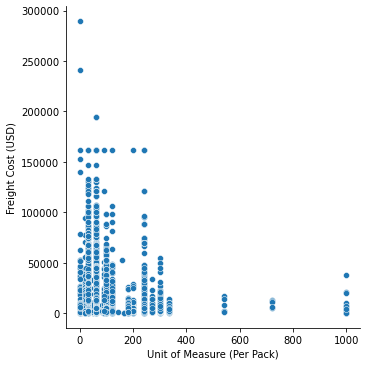

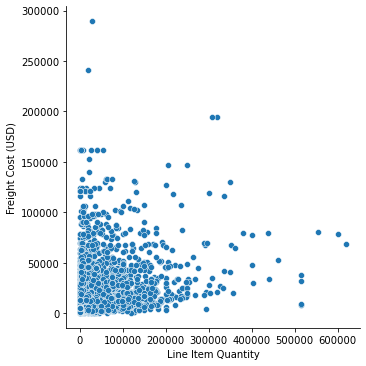

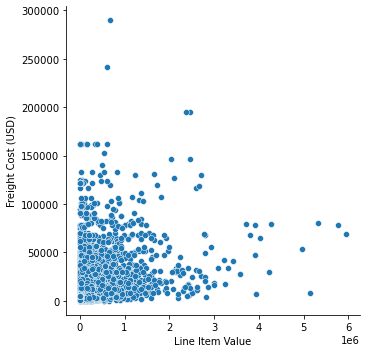

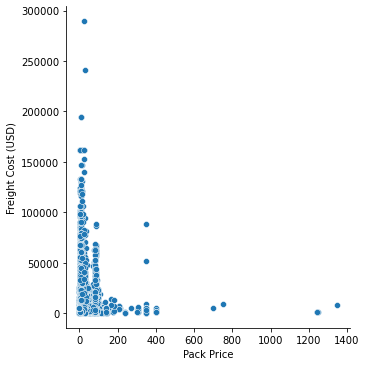

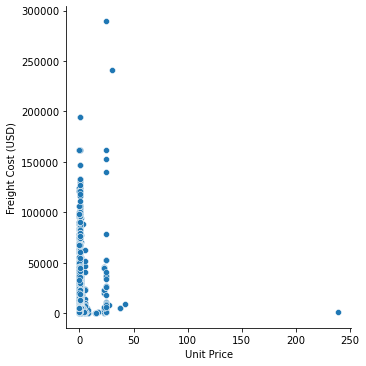

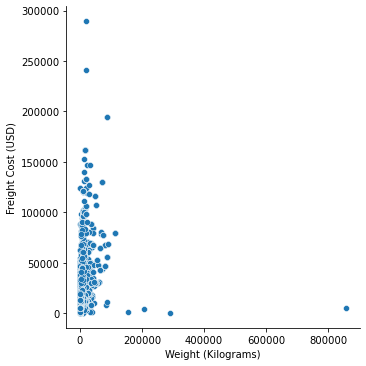

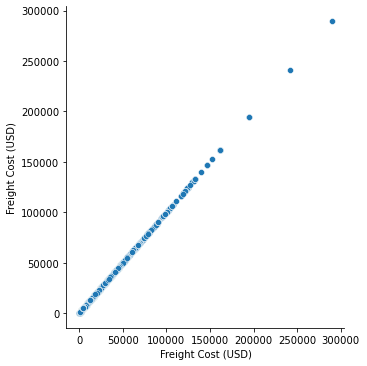

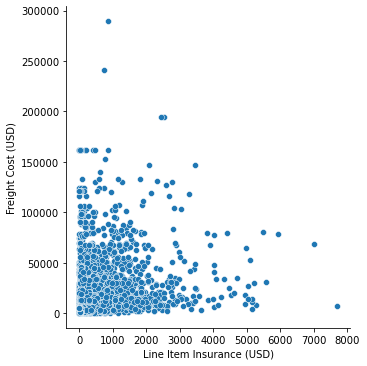

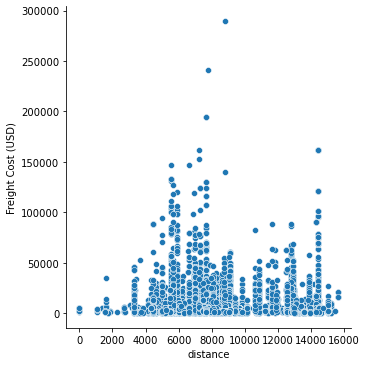

In [13]:
for i in numerical:
    sns.relplot(df[i],df['Freight Cost (USD)'])
    plt.show()

In [14]:
df[df['Sub Classification']=='Adult']

ID Project Code            PQ # PO / SO # ASN/DN #  Country  \
2      12830   127-KE-T01  Pre-PQ Process  SO-21980  DN-1049    Kenya   
3      82480   151-NG-T30        FPQ-9432  SO-42332  DN-2687  Nigeria   
4      82487   151-NG-T30        FPQ-9432  SO-41682  DN-2729  Nigeria   
5      82494   151-NG-T30        FPQ-9432  SO-42644  DN-2764  Nigeria   
6      82497   151-NG-T30        FPQ-9432  SO-42807  DN-2775  Nigeria   
...      ...          ...             ...       ...      ...      ...   
10316  11072   100-LB-T01  Pre-PQ Process  SO-33890  DN-1486  Lebanon   
10317  11073   100-LB-T01  Pre-PQ Process  SO-33900  DN-1487  Lebanon   
10318  11074   100-LB-T01  Pre-PQ Process  SO-33910  DN-1488  Lebanon   
10320  11694   100-LB-T01  Pre-PQ Process  SO-33910  DN-1488  Lebanon   
10323  12327   100-LB-T01  Pre-PQ Process  SO-33910  DN-1488  Lebanon   

      Managed By Fulfill Via Vendor INCO Term Shipment Mode  \
2       PMO - US    From RDC   N/A - From RDC           Air   
3       PMO - US    From RDC   N/A - From RDC           Air   
4       PMO - US    From RDC   N/A - From RDC           Air   
5       PMO - US    From RDC   N/A - From RDC           Air   
6       PMO - US    From RDC   N/A - From RDC           Air   
...          ...         ...              ...           ...   
10316   PMO - US    From RDC   N/A - From RDC           Air   
10317   PMO - US    From RDC   N/A - From RDC           Air   
10318   PMO - US    From RDC   N/A - From RDC           Air   
10320   PMO - US    From RDC   N/A - From RDC           Air   
10323   PMO - US    From RDC   N/A - From RDC           Air   

      PQ First Sent to Client Date PO Sent to Vendor Date  \
2                   Pre-PQ Process         N/A - From RDC   
3                           3/1/12         N/A - From RDC   
4                           3/1/12         N/A - From RDC   
5                           3/1/12         N/A - From RDC   
6                           3/1/12         N/A - From RDC   
...                            ...                    ...   
10316            Date Not Captured         N/A - From RDC   
10317            Date Not Captured         N/A - From RDC   
10318            Date Not Captured         N/A - From RDC   
10320            Date Not Captured         N/A - From RDC   
10323            Date Not Captured         N/A - From RDC   

      Scheduled Delivery Date Delivered to Client Date Delivery Recorded Date  \
2                   15-Jan-09                15-Jan-09              15-Jan-09   
3                    2-Aug-12                 3-Jun-12               3-Jun-12   
4                    2-Aug-12                 9-Jul-12               9-Jul-12   
5                    2-Aug-12                24-Jul-12              24-Jul-12   
6                    2-Aug-12                24-Jul-12              24-Jul-12   
...                       ...                      ...                    ...   
10316               18-Nov-09                18-Nov-09              18-Nov-09   
10317               18-Nov-09                18-Nov-09              18-Nov-09   
10318               24-Nov-09                24-Nov-09              24-Nov-09   
10320               24-Nov-09                24-Nov-09              24-Nov-09   
10323               24-Nov-09                24-Nov-09              24-Nov-09   

      Product Group Sub Classification         Vendor  \
2               ARV              Adult  SCMS from RDC   
3               ARV              Adult  SCMS from RDC   
4               ARV              Adult  SCMS from RDC   
5               ARV              Adult  SCMS from RDC   
6               ARV              Adult  SCMS from RDC   
...             ...                ...            ...   
10316           ARV              Adult  SCMS from RDC   
10317           ARV              Adult  SCMS from RDC   
10318           ARV              Adult  SCMS from RDC   
10320           ARV              Adult  SCMS from RDC   
10323           ARV              Adult  SCM

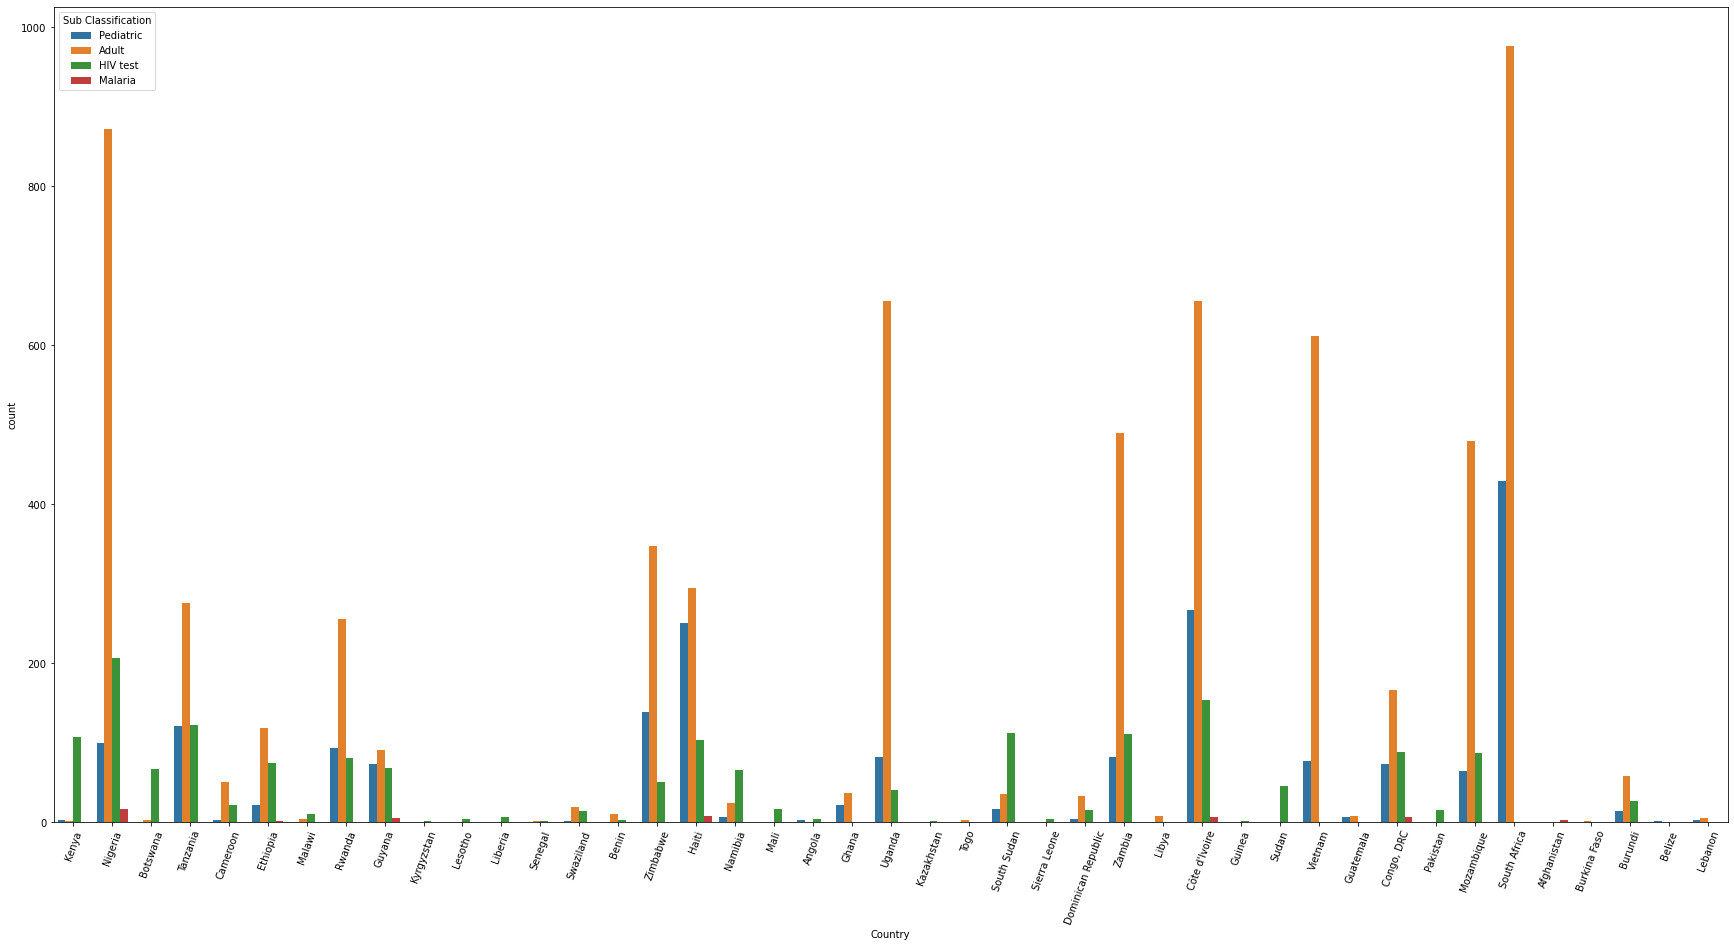

In [15]:
plt.figure(figsize=(30,15))
sns.countplot(df['Country'],hue=df['Sub Classification'])
plt.xticks(rotation=70)
plt.show()

In [16]:
# vendors count less than 50
vendors=df['Vendor'].value_counts()<50
vendors=pd.DataFrame(vendors)
vendors[vendors['Vendor']==True]

Vendor
JANSSEN SCIENCES IRELAND                 True
EMCURE PHARMACEUTICALS LTD               True
ASPEN PHARMACARE                         True
MICRO LABS LIMITED                       True
BIO-RAD LABORATORIES (FRANCE)            True
Hoffmann-La Roche ltd Basel              True
Abbott                                   True
GLAXOSMITHKLINE EXPORT LIMITED           True
IDA FOUNDATION                           True
Premier Medical Corporation Ltd.         True
REINBOLD EXPORT IMPORT                   True
SUN PHARMACEUTICAL INDUSTRIES LTD        True
INTERNATIONAL HEALTHCARE DISTRIBUTORS    True
AMSTELFARMA B.V.                         True
IDIS LIMITED                             True
BIOLYTICAL LABORATORIES INC.             True
NOVARTIS PHARMA SERVICES AG              True
ZEPHYR BIOMEDICALS                       True
INVERNESS MEDICAL INNOVATIONS            True
IMRES B.V.                               True
GILEAD SCIENCES IRELAND, INC.            True
ABBVIE                                   True
ACCOUN NIGERIA LIMITED                   True
SWORDS LABORATORIES                      True
MISSIONPHARMA A/S                        True
TURE PHARMACEUTICALS                     True
HUMAN GMBH                               True
B&C GROUP S.A.                           True
ETHNOR DEL ISTMO S.A.                    True
WAGENIA                                  True
EY Laboratories                          True
BUNDI INTERNATIONAL DIAGNOSTICS LTD      True
AHN (PTY) LTD (AKA UCB (S.A.)            True
OMEGA DIAGNOSTICS LTD                    True
ACCESS BIO, INC.                         True
KAS MEDICS LIMITED                       True
SYSMEX AMERICA INC                       True
SETEMA LIMITED PLC                       True
PUETRO RICO PHARMACEUTICAL, INC.         True
CENTRAL PHARMACEUTICAL COMPANY           True
MEDMIRA EAST AFRICA LTD.                 True
RAININ INSTRUMENT, LLC.                  True
SUB-SAHARAN BIOMEDICAL P.L.C.            True
ACTION MEDEOR E.V.                       True
THE MEDICAL EXPORT GROUP BV              True
PLURIPHARM S.A.                          True

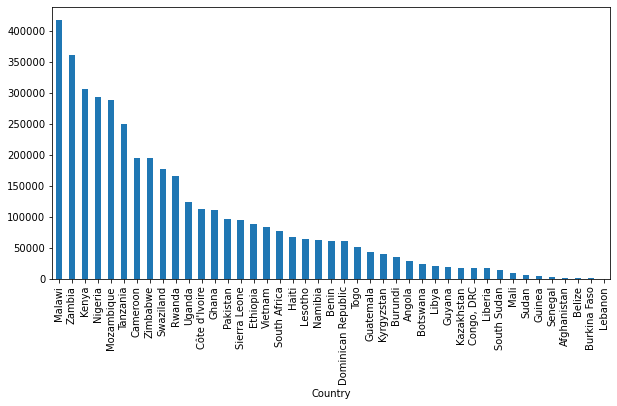

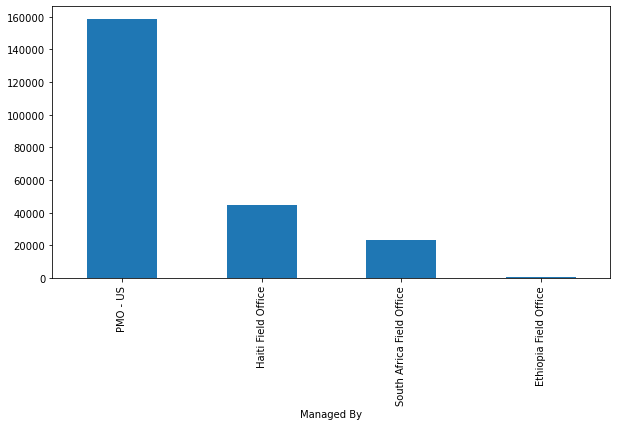

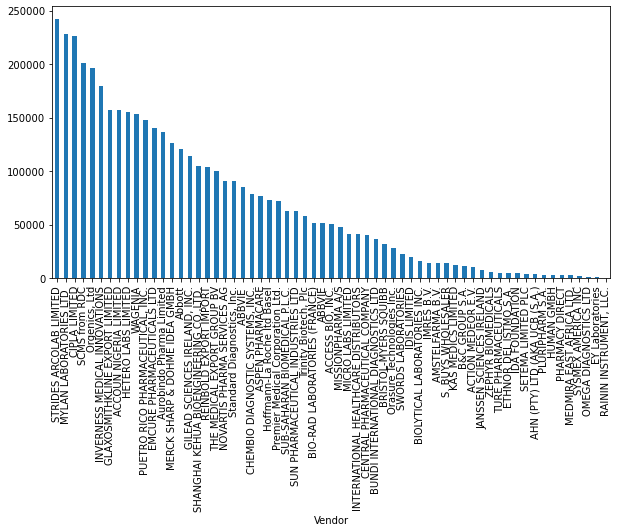

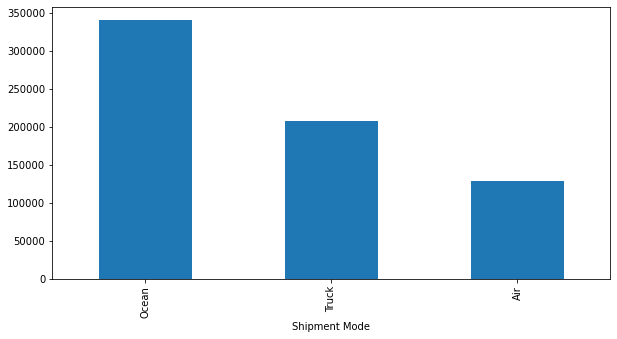

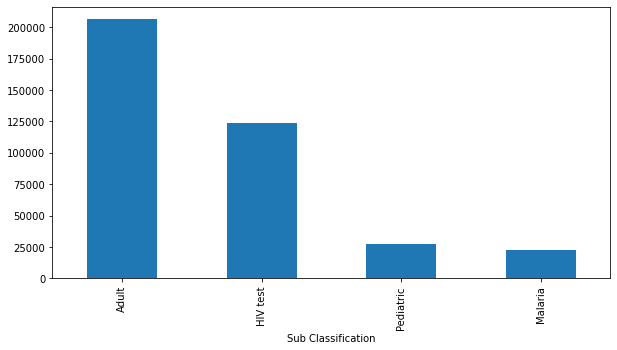

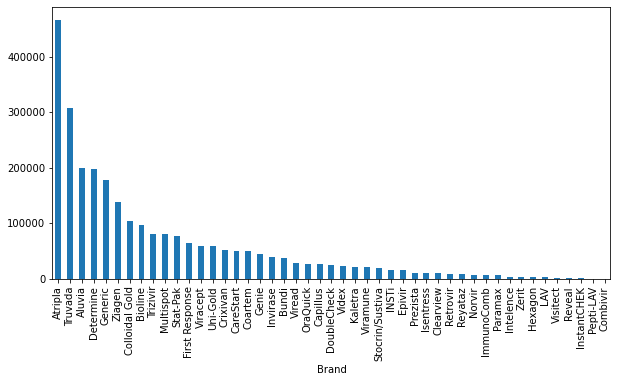

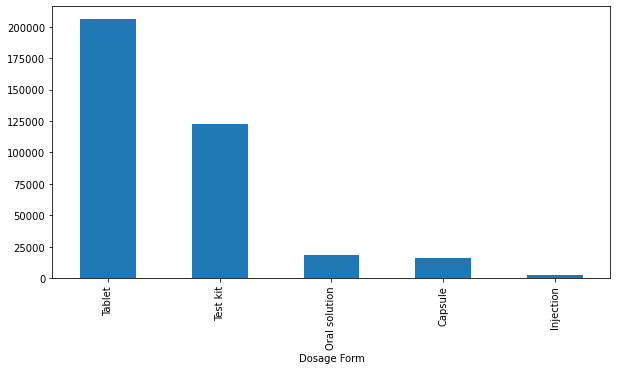

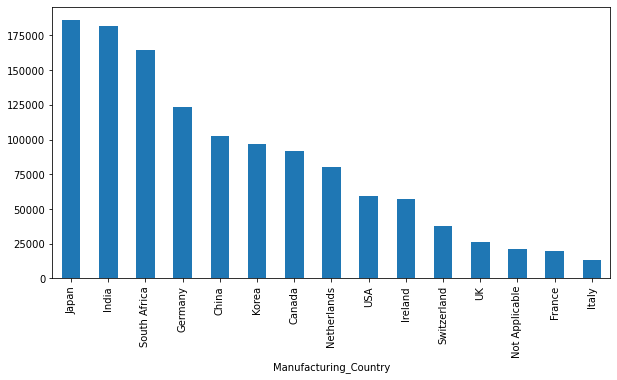

In [17]:
# plotting categorical values with Line item value

for i in categorical:
    plt.figure(figsize=(10,5)) 
    df.groupby(i)['Line Item Value'].mean().sort_values(ascending=False).plot.bar()
    plt.show()

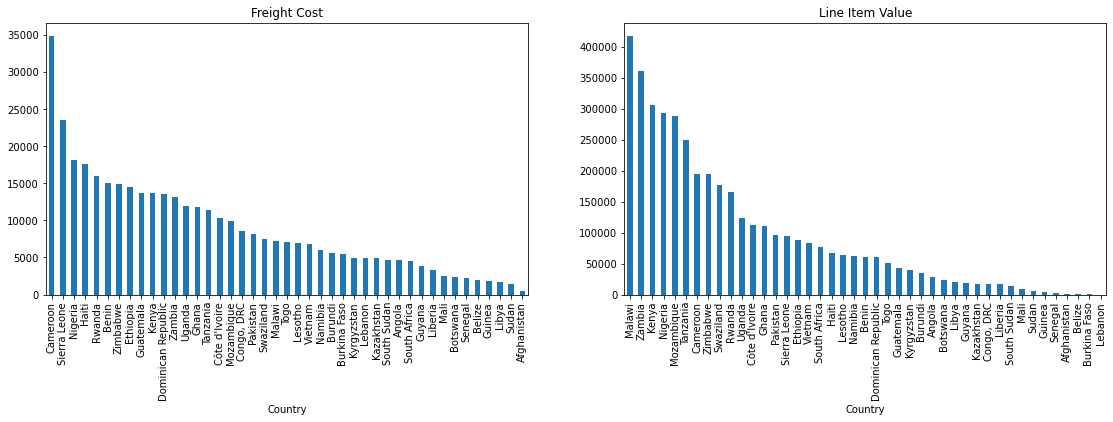

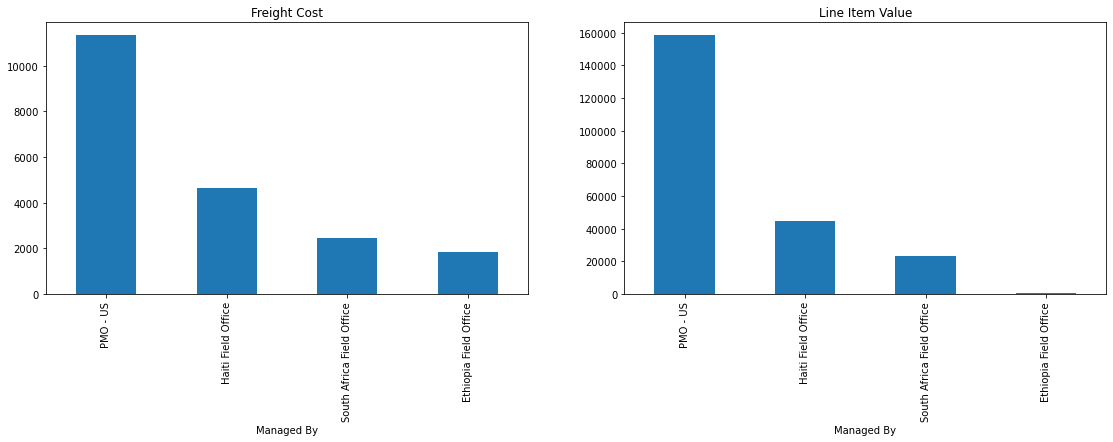

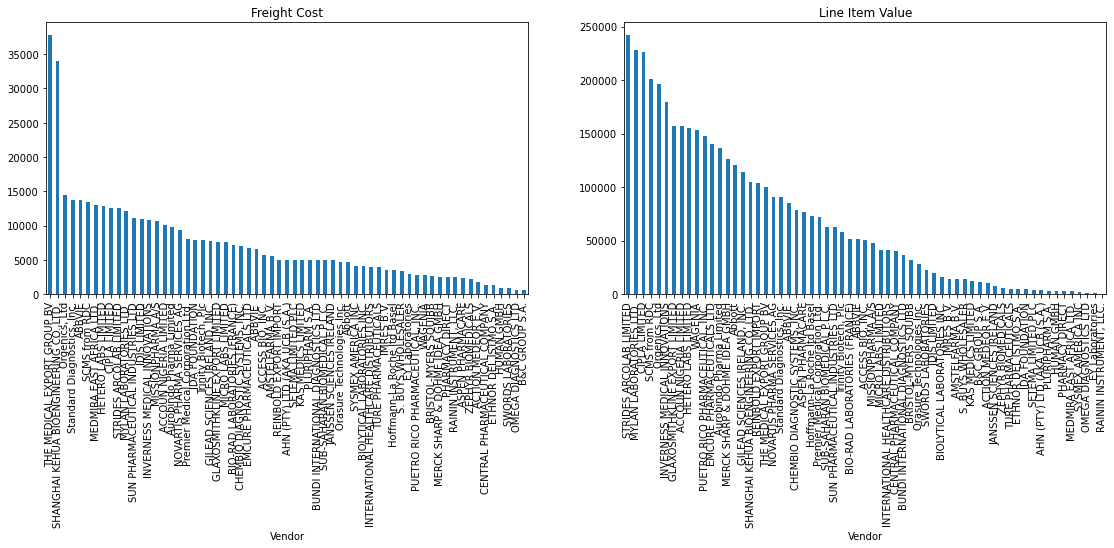

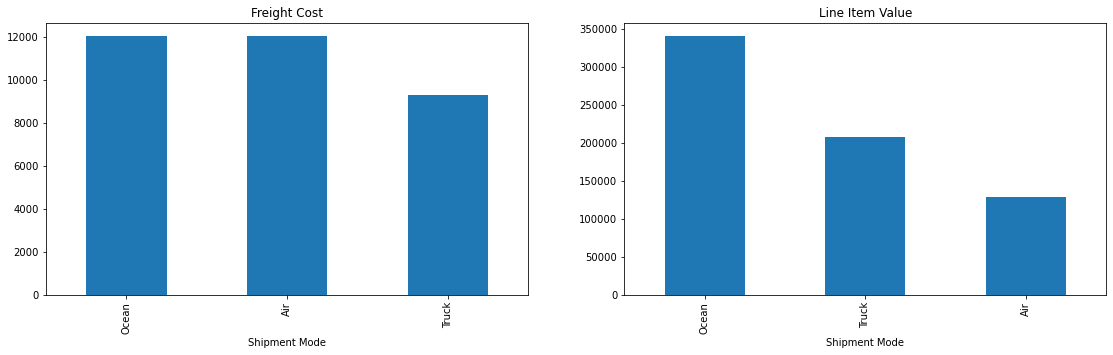

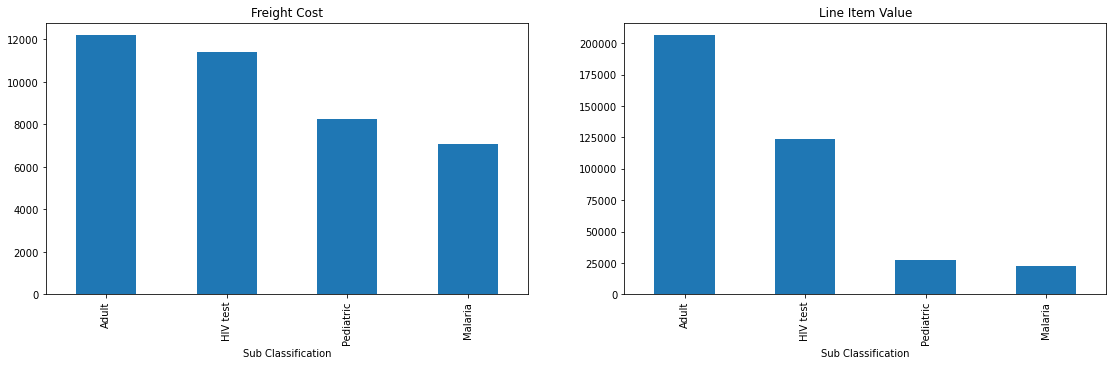

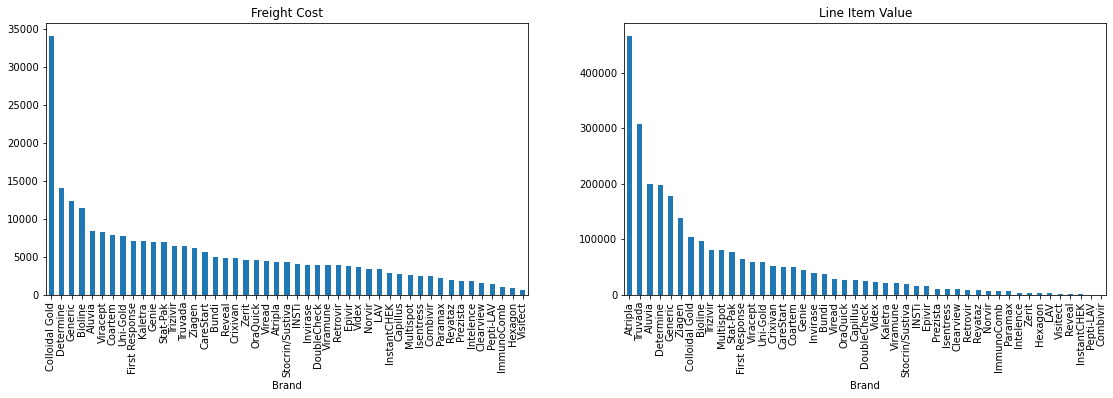

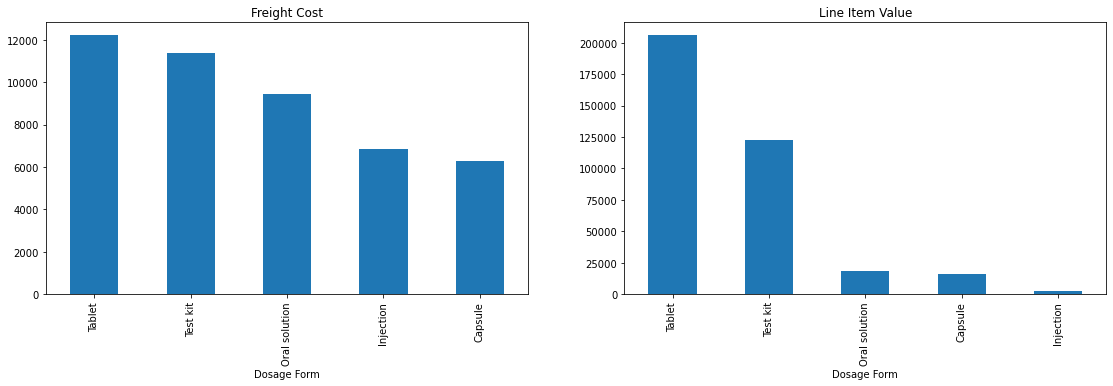

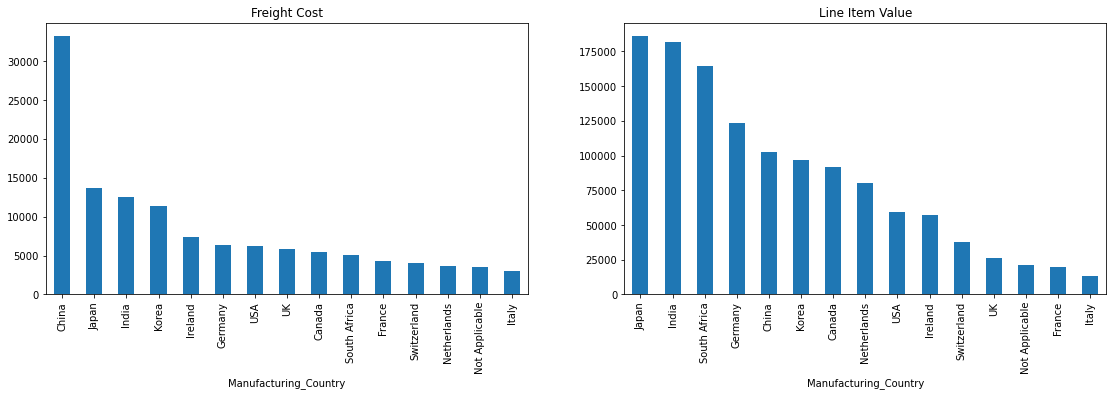

In [18]:
# combined plot

for i in categorical:
    plt.figure(figsize=(19,5)) 
    plt.subplot(1,2,1)
    plt.title('Freight Cost')
    df.groupby(i)['Freight Cost (USD)'].mean().sort_values(ascending=False).plot.bar() 
    
    plt.subplot(1,2,2)
    plt.title('Line Item Value') 
    df.groupby(i)['Line Item Value'].mean().sort_values(ascending=False).plot.bar()
    plt.show()

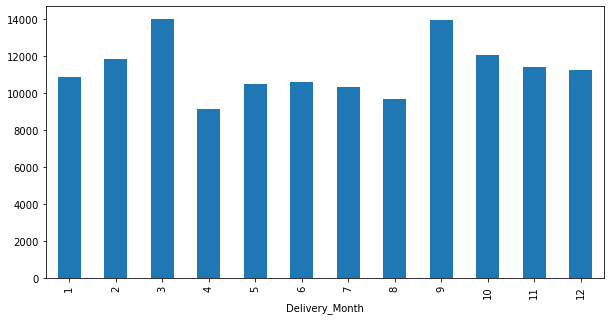

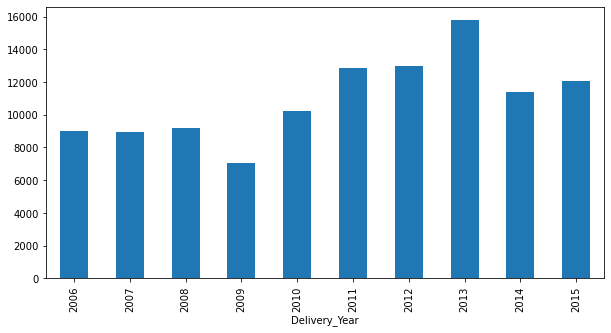

In [19]:
# plotting date values with Freight Cost

for i in date:
    plt.figure(figsize=(10,5)) 
    df.groupby(i)['Freight Cost (USD)'].mean().plot.bar()
    plt.show()
    

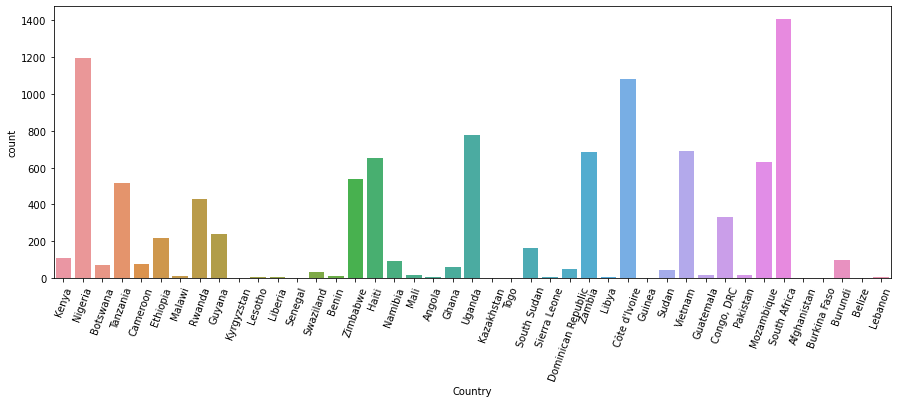

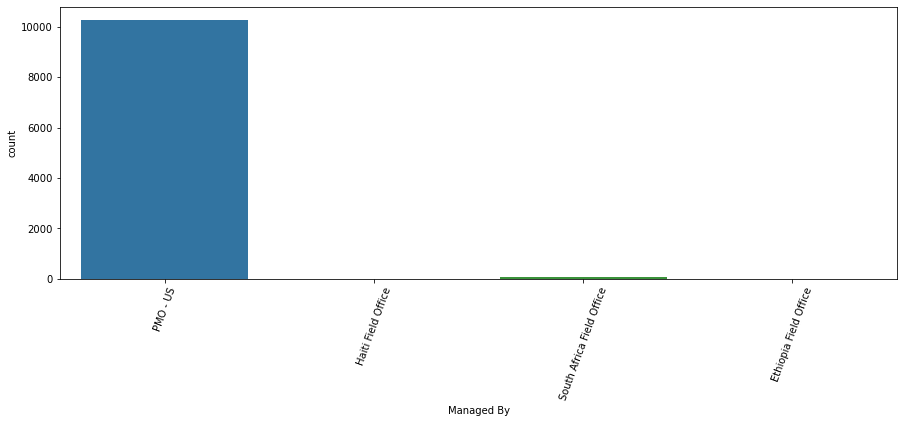

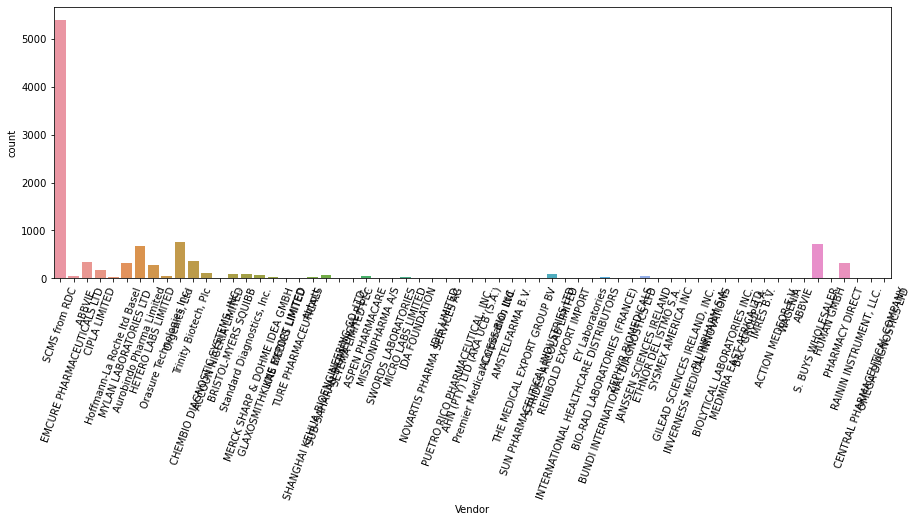

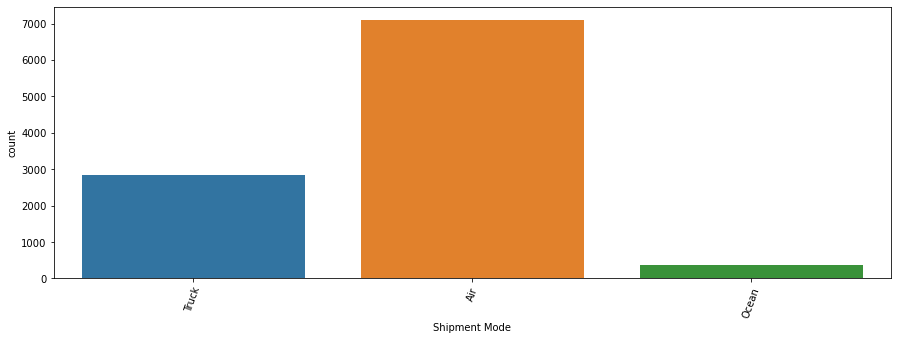

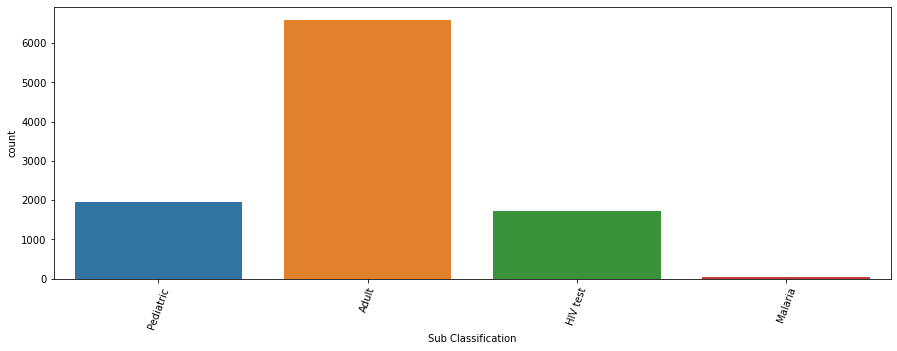

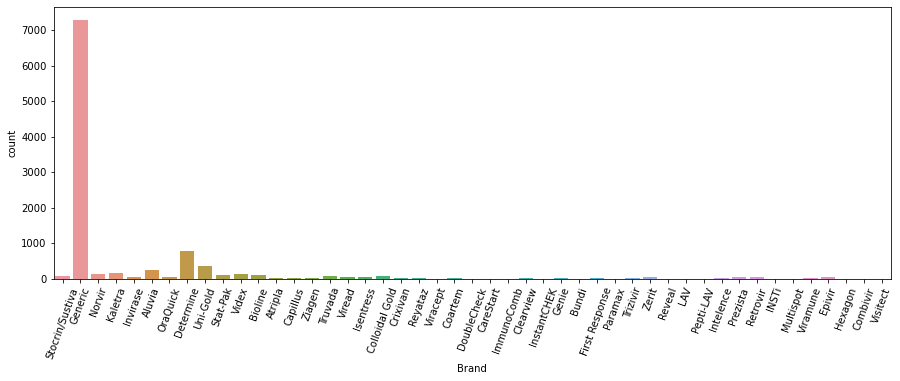

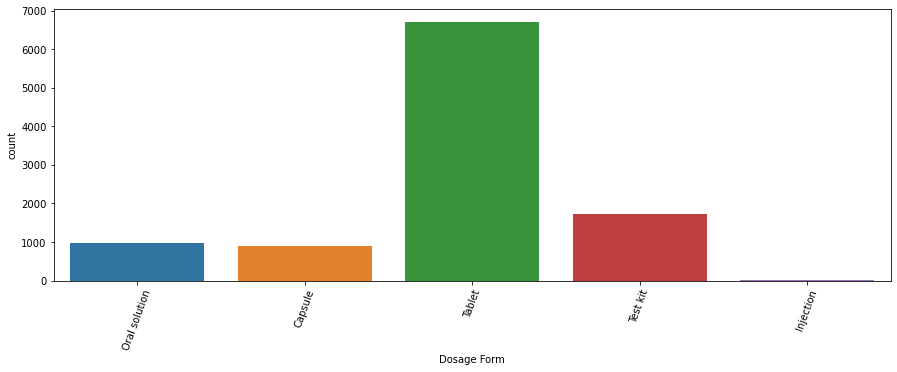

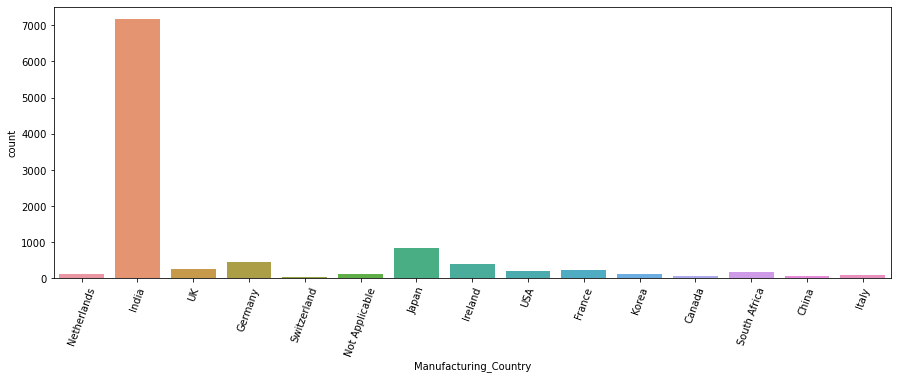

In [20]:
# countplot of categorical values

for i in categorical:
    plt.figure(figsize=(15,5)) 
    sns.countplot(x=df[i])
    plt.xticks(rotation=70)
    plt.show()

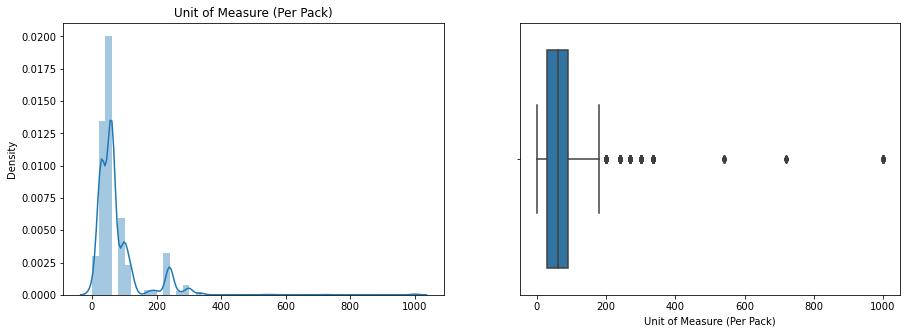

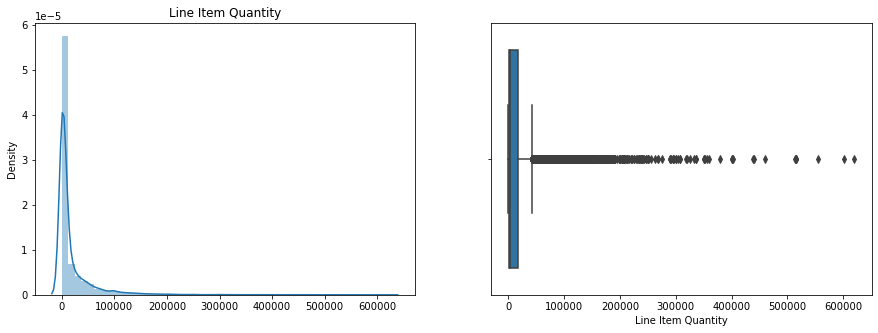

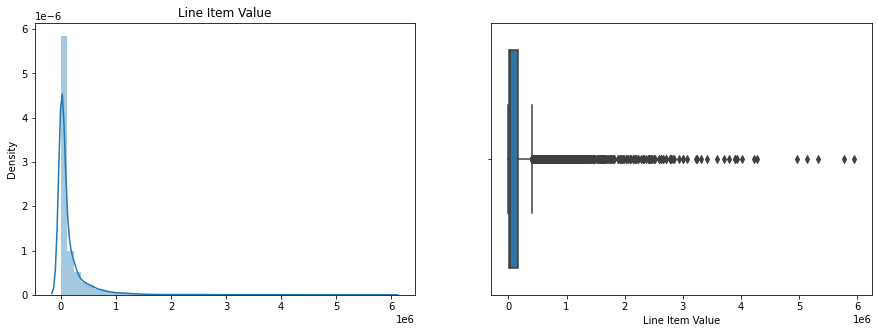

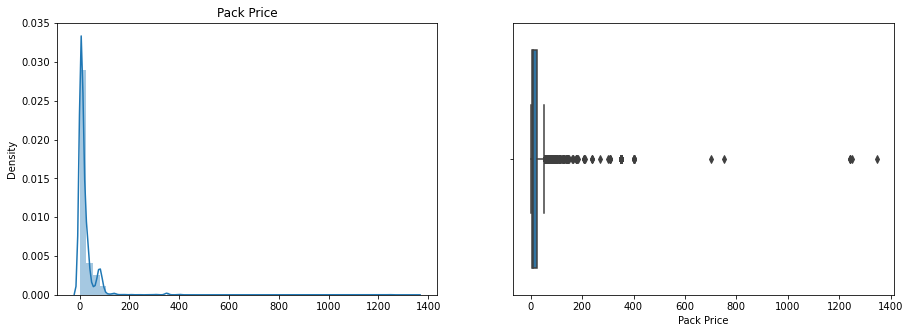

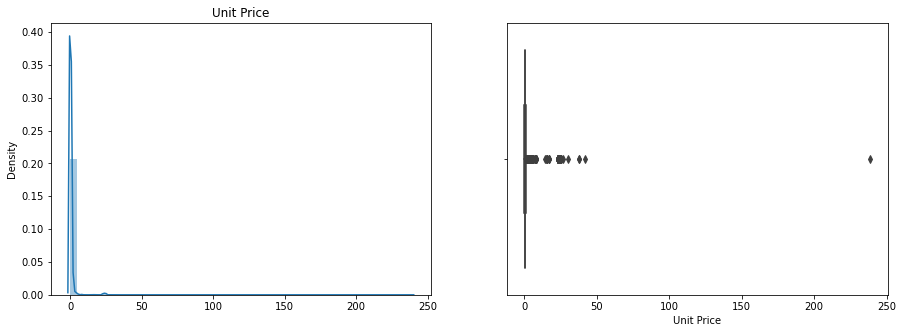

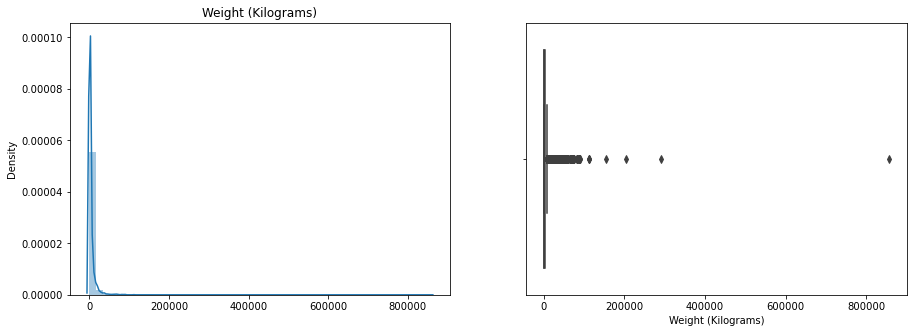

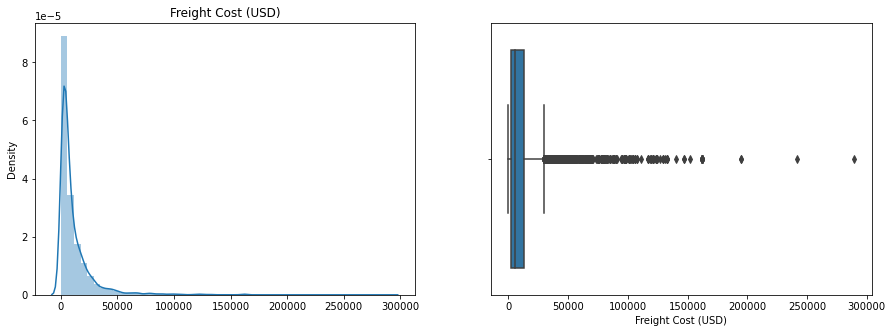

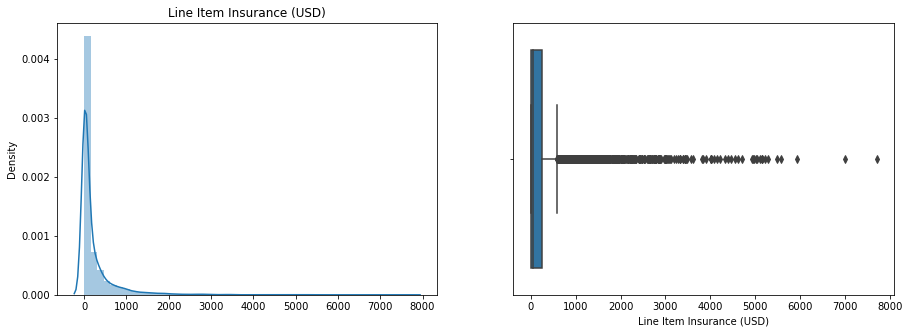

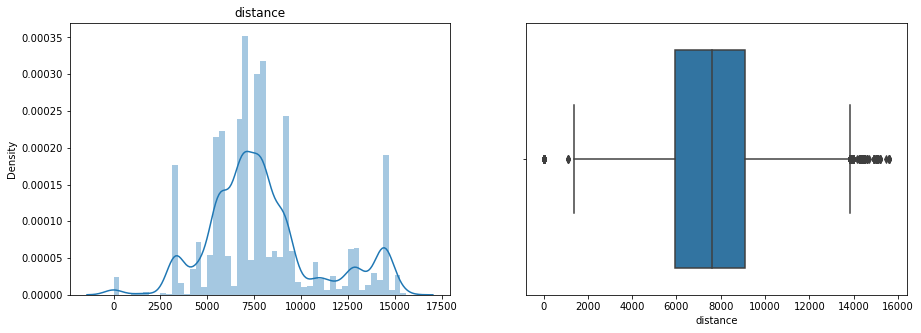

In [21]:
# plotting numerical values

for i in df[numerical]:
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.title(i)
    sns.distplot(x=df[i])
    plt.subplot(1,2,2)
    sns.boxplot(x=df[i])
    plt.show()

In [24]:
#iqr for removing outliers

for feature in numerical:
    if feature !='distance':
        IQR=df[feature].quantile(0.75)-df[feature].quantile(0.25)
        lower=df[feature].quantile(0.25)-(IQR*1.5)
        upper=df[feature].quantile(0.75)+(IQR*1.5)
        print(feature,lower,upper)
        df.loc[df[feature]>=upper,feature]=upper
        df.loc[df[feature]<=lower,feature]=lower

Unit of Measure (Per Pack) -60.0 180.0
Line Item Quantity -24539.625 41987.375
Line Item Value -238884.22874999998 409645.96124999993
Pack Price -25.08875 52.80125
Unit Price -0.505 1.055
Weight (Kilograms) -4658.875 8714.125
Freight Cost (USD) -13934.5 29797.5
Line Item Insurance (USD) -345.05 593.8299999999999


<AxesSubplot:>

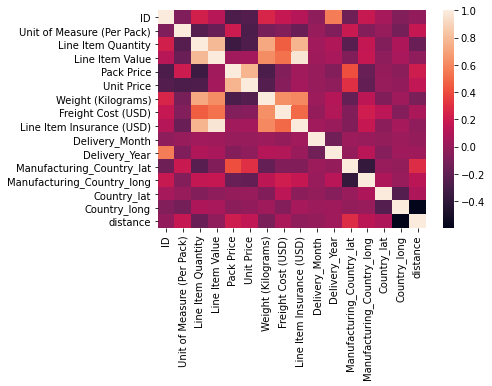

In [25]:
sns.heatmap(df.corr())

In [26]:
# checking for correlation

def correlation(df,threshold):
    col_corr=set()
    corr_matrix=df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                col_name=corr_matrix.columns[i]
                col_corr.add(col_name)
    return list(col_corr)

correlation(df,.90)

['Line Item Insurance (USD)']

<Figure size 1080x720 with 0 Axes>

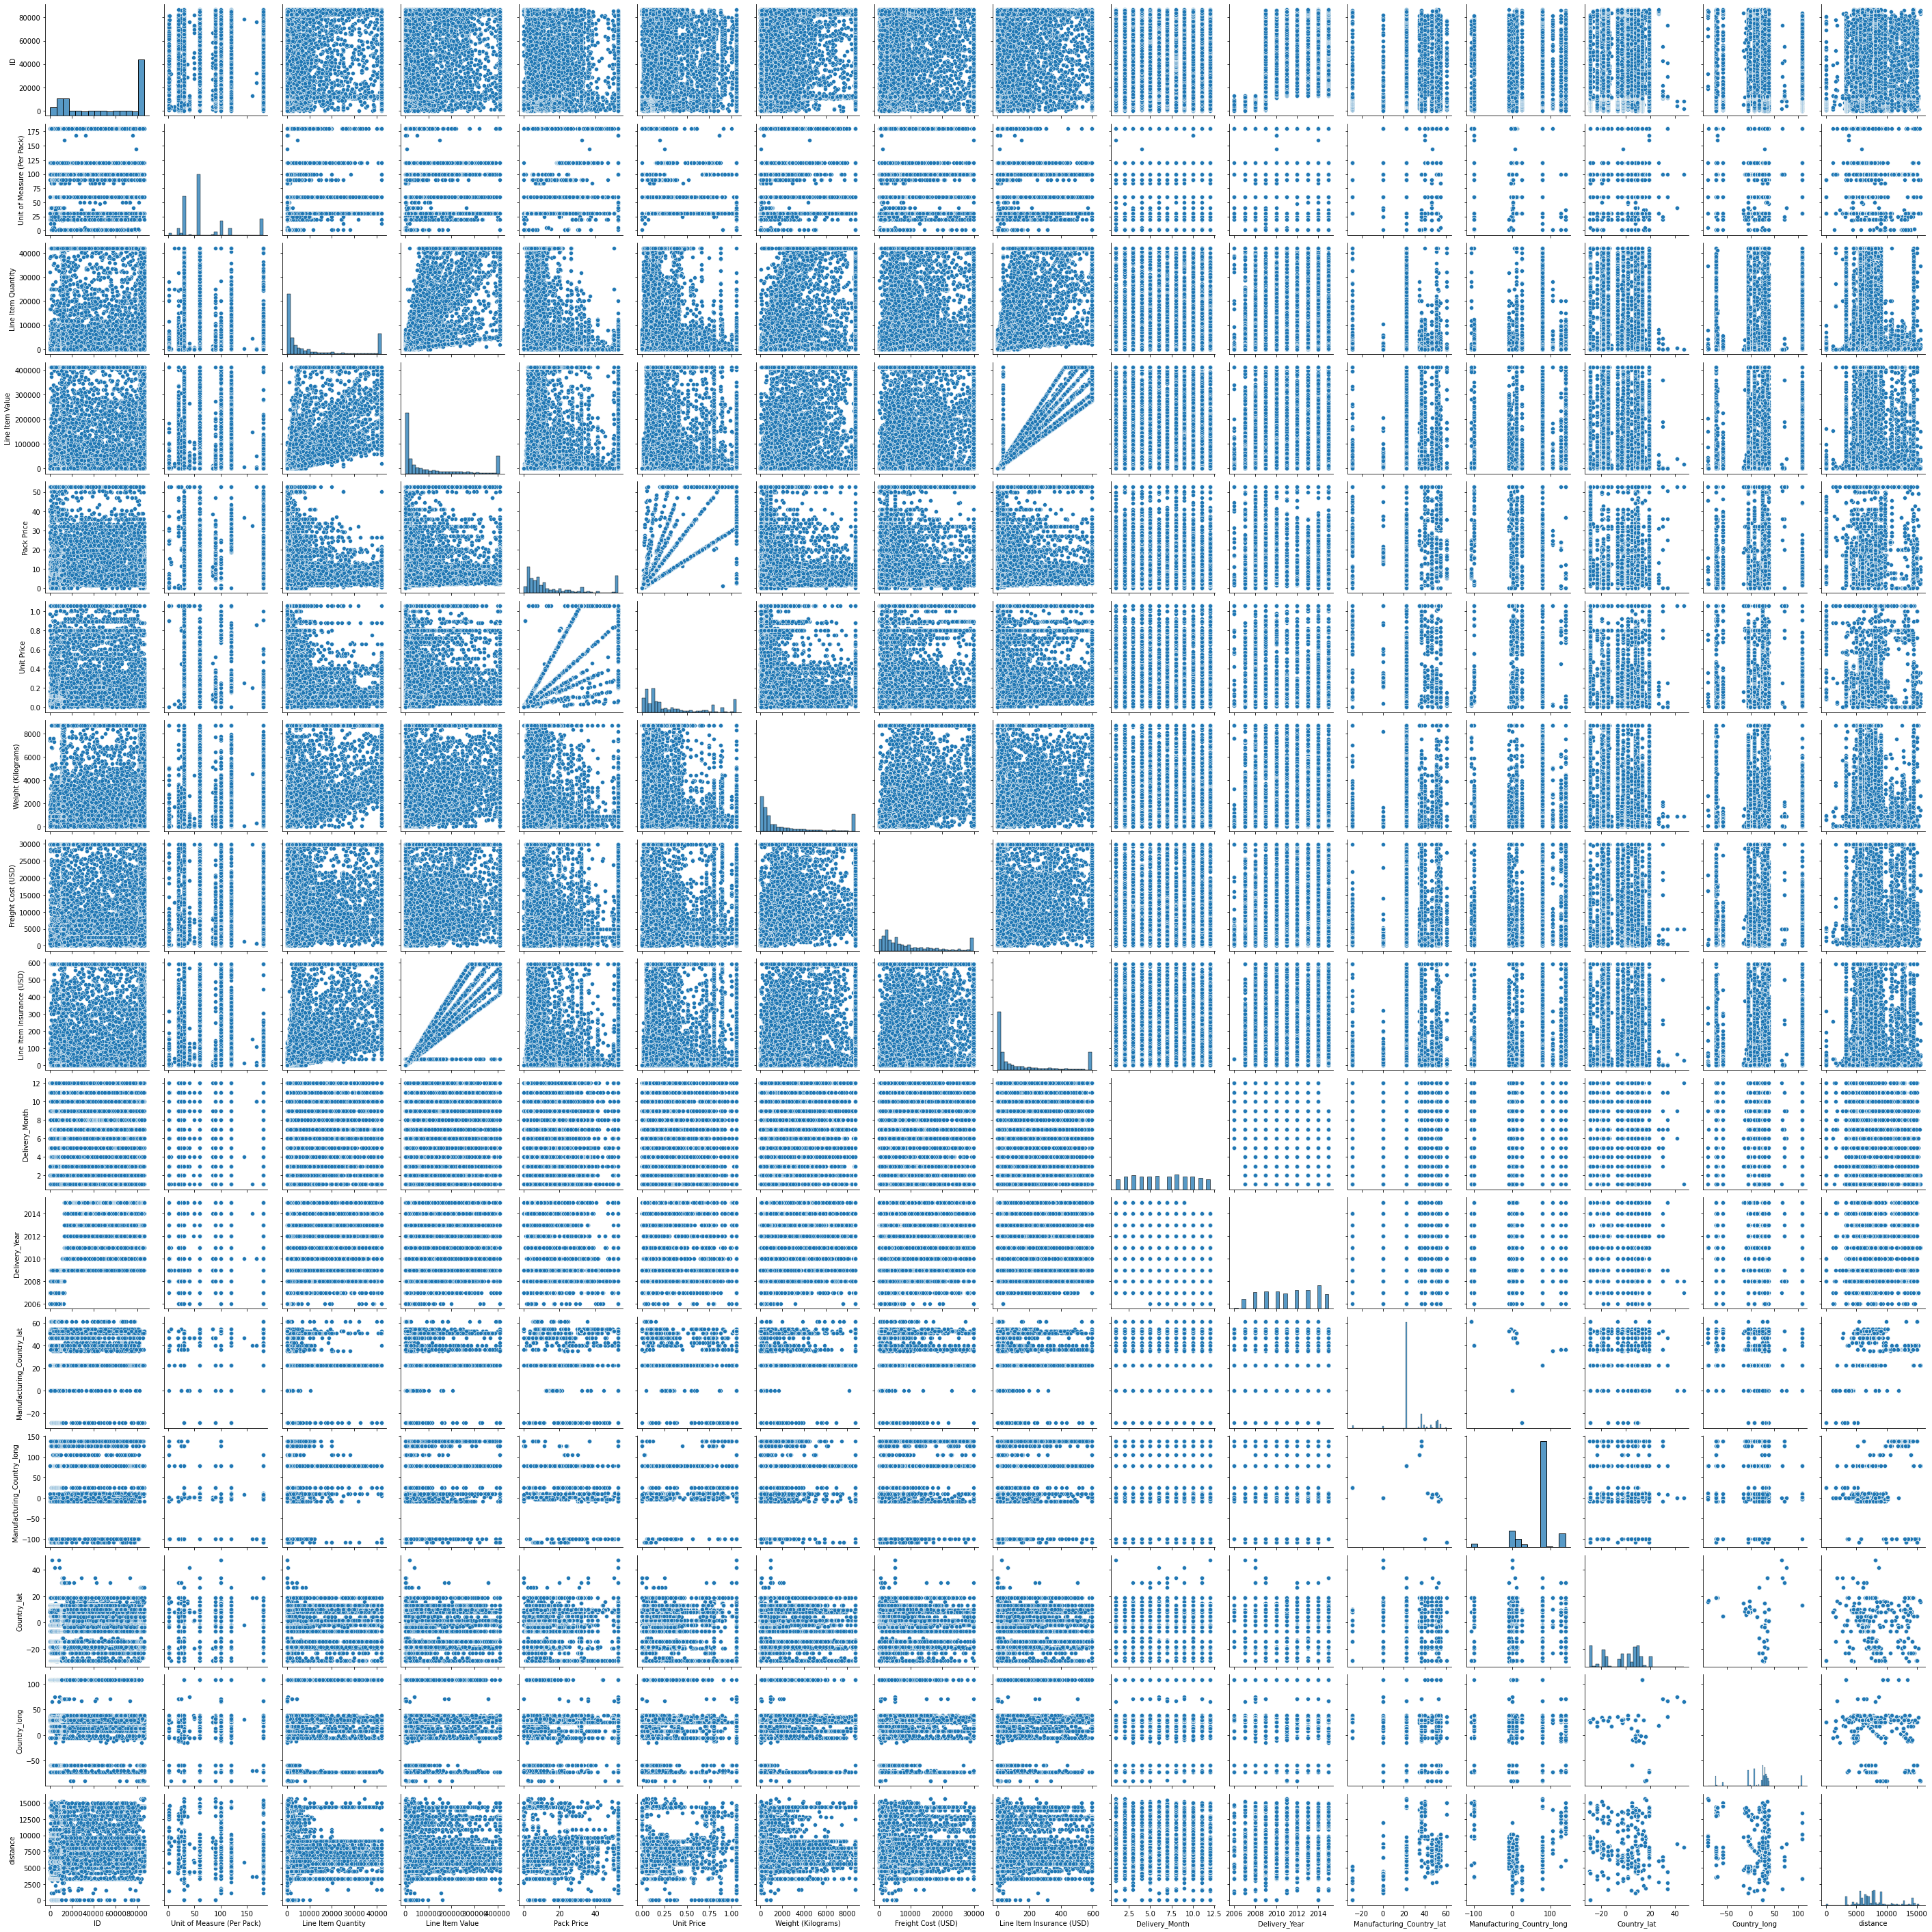

In [27]:
plt.figure(figsize=(15,10))
sns.pairplot(df)

In [28]:
# removing correlated features and saving data

df=df.drop(labels=['Line Item Insurance (USD)'],axis=1)
df
df.to_csv('preprocessed_2.csv',index=False)